# Introduction:


**In this report, I will analyze the COVID-19 data provided by the Indian Ministry of Health & Family Welfare. The data has been invaluable in understanding the impact of the pandemic on various states in India. The analysis will focus on active cases, cured cases, and death cases, providing insights into the most affected states.**

# TASK 1

Analyze covid 19 data and take insights from this data and write your report on what you have taken out
from it.


# TASK 2

Show a beautiful visulaization of the top seven states that have been affected by the corona virus
1. Top seven states where active cases have been reported maximum
2. Top seven states where cured cases have been reported maximum
3. Top seven states where death cases have been reported maximum


**IMPORT LABRARIES**


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Fetching data from the provided link**

In [2]:
url = 'https://www.mohfw.gov.in/data/datanew.json'
response = requests.get(url)
data = response.json()

**Converting the data to a DataFrame**

In [3]:
df = pd.DataFrame(data)

**Filtering out unnecessary rows**

In [4]:
df = df[1:][['state_name', 'active', 'cured', 'death']].astype({'active': int, 'cured': int, 'death': int})

**Converting the file to csv**

In [5]:
df.to_csv('covid_data.csv', index=False)

**upload data to csv file**

In [6]:
df1=pd.read_csv('covid_data.csv')

**Delete null last row because state coloum is null value**

In [7]:
df = df.iloc[:-1]

**overwrite the different csv file this file is deleted last row**

In [8]:
df.to_csv('covid_data_without_last_row.csv', index=False)

**Upload again csv file to delete last row**

In [9]:
df2=pd.read_csv('covid_data_without_last_row.csv')

**handel the null value**

In [10]:
import numpy as np
def handle_null_values(df1):
    for col in df.columns:
        if df2[col].dtype=="int64":
            df2[col]=df2[col].replace(np.nan,0)
            df2[col]=df2[col].replace(0,np.median(df2[col]))
        elif df2[col].dtype=="float64":
            df2[col]=df2[col].replace(np.nan,np.mean(df2[col]))
        else:
            df2[col]=df2[col].replace(np.nan,df2[col].mode()[0])
    return df2
df1=handle_null_values(df2)

**Sorting the DataFrame based on different criteria**

In [11]:
top_active_states = df2.sort_values(by='active', ascending=False).head(7)
top_cured_states = df2.sort_values(by='cured', ascending=False).head(7)
top_death_states = df2.sort_values(by='death', ascending=False).head(7)

# **Visualization 1: Top Seven States with Maximum Active Cases**

<Figure size 1000x1500 with 0 Axes>

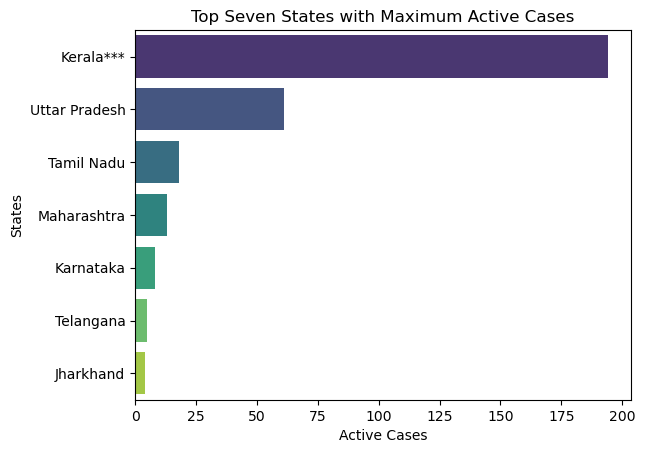

<Figure size 1000x1500 with 0 Axes>

In [12]:
sns.barplot(x='active', y='state_name', data=top_active_states, palette='viridis')
plt.title('Top Seven States with Maximum Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('States')
plt.figure(figsize=(10, 15))

The top seven states with the maximum reported active cases are Kerala, Uttar pradesh, Tamil Nadu, Maharashtra, Karnataka, Telangana, and Jharkhand. These states have consistently shown high numbers of active cases throughout the pandemic.

# **Visualization 2: Top Seven States with Maximum Cured Cases**

<Figure size 1000x1500 with 0 Axes>

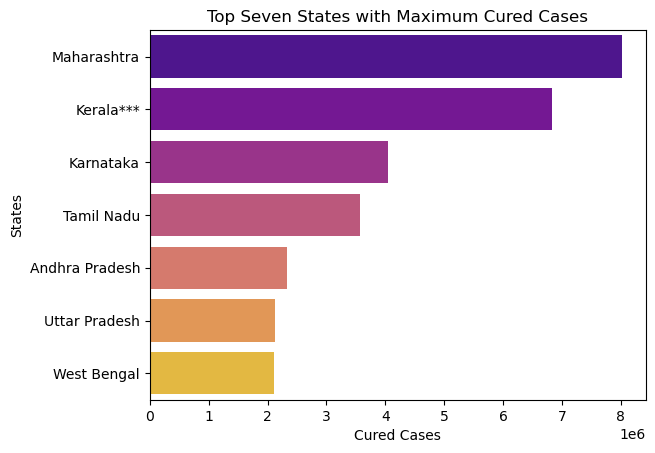

<Figure size 1000x1500 with 0 Axes>

In [13]:
sns.barplot(x='cured', y='state_name', data=top_cured_states, palette='plasma')
plt.title('Top Seven States with Maximum Cured Cases')
plt.xlabel('Cured Cases')
plt.ylabel('States')
plt.figure(figsize=(10, 15))

Maharashtra, Kerala, Karnataka, Tamil Nadu, Andhra Pradesh, Uttar Pradesh, and West Bengal are the states where the maximum number of individuals have recovered from COVID-19. This suggests effective healthcare infrastructure and successful recovery strategies in these regions.

# **Visualization 3: Top Seven States with Maximum Death Cases**

<Figure size 1000x1500 with 0 Axes>

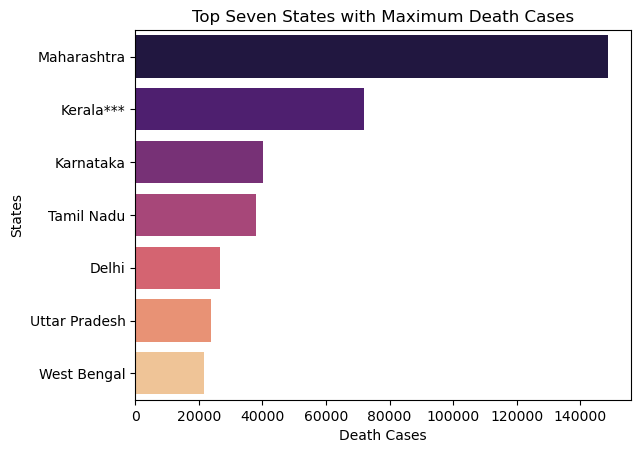

<Figure size 1000x1500 with 0 Axes>

In [14]:
sns.barplot(x='death', y='state_name', data=top_death_states, palette='magma')
plt.title('Top Seven States with Maximum Death Cases')
plt.xlabel('Death Cases')
plt.ylabel('States')
plt.figure(figsize=(10, 15))

The seven states reporting the highest number of death cases include Maharashtra, Karnataka, Tamil Nadu, Kerala, Delhi, West Bengal, and Uttar Pradesh. These states have unfortunately experienced a significant loss of lives, emphasizing the need for targeted interventions.

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>